<a id='title'></a>

# Analyzing the 2020 American Presidential Election using Twitter
## Page 4: Comparing Polling and Sentiment Analysis Data

<i> David Grinberg</i>
___________________

<a id='contents'> </a>
## Table of Contents
1. [<b>Project Introduction and 2020 Background Info](./Final_Project_1.ipynb)<br>
1. [<b>Analyzing Polling Data](./Final_Project_2.ipynb)<br>
1. [<b>Twitter Sentiment Analysis](./Final_Project_3.ipynb)<br>
1. [<b>Comparing Polling Data with Sentiment Analysis Data](#title)<br>
    4.1 [Packages Used](#packageimports)<br>
    4.2 [Importing Data](#imports)<br>
    4.3 [Sentiment Index Graphs](#graphs)<br>
    4.4 [Correlations between Polling data and Sentiment Indexes](#corr)<br>
    4.5 [Granger Causality Analysis](#granger)<br>
    4.6 [Adjusted Sentiment Indexes](#filter)<br>
1. [<b>Project Conclusion](./Final_Project_5.ipynb)<br>







________________________

<a id='packageimports'></a>
### Packages used

- Pandas is used to import, edit, manipulate, and create .csv files
- Matplotlib.pyplot is used to create the graphs
- Matplotlib.patches is used to manually create legends for graphs.
- statsmodels.tsa.statstools is used to run granger causality analysis

[Table of Contents](#contents)
________________________

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

### Importing Sentiment and Polling Data from .csv files
<a id='imports'></a>

Importing the Biden and Trump's polling data as well as the VADER sentiment analysis for tweets referencing Donald Trump and Joe Biden.


[[Table of Contents]](#contents)
________________________

In [6]:
T_polls=pd.read_csv(r'D:/Final Project Econ/trump polling data.csv')
T_polls['end_date']=pd.to_datetime(T_polls['end_date'])
T_polls.set_index('answer',inplace=True)

B_polls=pd.read_csv(r'D:/Final Project Econ/biden polling data.csv')
B_polls['end_date']=pd.to_datetime(B_polls['end_date'])
B_polls.set_index('answer',inplace=True)

T_tweets=pd.read_csv(r'D:/Final Project Econ/trump sentiment and tweets.csv')
T_tweets['created_at']=pd.to_datetime(T_tweets['created_at'])
T_tweets.set_index('created_at',inplace=True)

B_tweets=pd.read_csv(r'D:/Final Project Econ/biden sentiment and tweets.csv')
B_tweets['created_at']=pd.to_datetime(B_tweets['created_at'])
B_tweets.set_index('created_at',inplace=True)

kamala_tweets=pd.read_csv(r'D:/Final Project Econ/kamala sentiment and tweets.csv')
kamala_tweets['created_at']=pd.to_datetime(kamala_tweets['created_at'])
kamala_tweets.set_index('created_at',inplace=True)

pence_tweets=pd.read_csv(r'D:/Final Project Econ/pence sentiment and tweets.csv')
pence_tweets['created_at']=pd.to_datetime(pence_tweets['created_at'])
pence_tweets.set_index('created_at',inplace=True)

dem_tweets=pd.read_csv(r'D:/Final Project Econ/dem sentiment and tweets.csv')
dem_tweets['created_at']=pd.to_datetime(dem_tweets['created_at'])
dem_tweets.set_index('created_at',inplace=True)

gop_tweets=pd.read_csv(r'D:/Final Project Econ/gop sentiment and tweets.csv')
gop_tweets['created_at']=pd.to_datetime(gop_tweets['created_at'])
gop_tweets.set_index('created_at',inplace=True)


"""
kamala_tweets
pence_tweets
dem_tweets
gop_tweets

"""

'\nkamala_tweets\npence_tweets\ndem_tweets\ngop_tweets\n\n'

In [7]:
T_polls['pct'].astype(float)
#T_polls['FTE2'].astype(float)
trump_pct=T_polls['pct'].array
trump_poll=T_polls['end_date'].array
#trump_alpha=T_polls['FTE2'].to_list()

In [8]:
# making a list of polling pcts & polling dates
B_polls['pct'].astype(float)
#B_polls['FTE2'].astype(float)
biden_pct=B_polls['pct'].array
biden_poll=B_polls['end_date'].array
#biden_alpha=B_polls['FTE2'].to_list()

In [9]:
dates=list(pd.date_range(start='2020-09-01', end='2020-11-03'))

biden_weighted_df=B_polls.loc['Biden']
biden_weighted_df.set_index('end_date',inplace=True)
trump_weighted_df=T_polls.loc['Trump']
trump_weighted_df.set_index('end_date',inplace=True)


i=0
trump_weighted={}
biden_weighted={}
while i<len(dates):
    temp1=float((trump_weighted_df.loc[dates[i]]['weighted_pct']).sum())
    temp2=float((trump_weighted_df.loc[dates[i]]['weight']).sum())
    temp3=temp1/temp2
    trump_weighted[dates[i]]=temp3  
    i=i+1

i=0    
while i<len(dates):
    temp1=float((biden_weighted_df.loc[dates[i]]['weighted_pct']).sum())
    temp2=float((biden_weighted_df.loc[dates[i]]['weight']).sum())
    temp3=temp1/temp2
    biden_weighted[dates[i]]=temp3
    i=i+1

t_weighted_mean=pd.Series(trump_weighted)
t_weighted_mean.sort_index(inplace=True)
b_weighted_mean=pd.Series(biden_weighted,dtype=float)
b_weighted_mean.sort_index(inplace=True)

In [10]:
dates.index(dates[5])

5

In [11]:
B_tweets=B_tweets.loc[:'2020-11-03']
T_tweets=T_tweets.loc[:'2020-11-03']

kamala_tweets=kamala_tweets.loc[:'2020-11-03']
pence_tweets=pence_tweets.loc[:'2020-11-03']
dem_tweets=dem_tweets.loc[:'2020-11-03']
gop_tweets=gop_tweets.loc[:'2020-11-03']

kamala_tweets
pence_tweets
dem_tweets
gop_tweets
B_tweets
T_tweets

#making stuff into list
T_daily_VADER=[]
for i in dates:
    T_daily_VADER.append(T_tweets.loc[i]['compound'].mean())
    
B_daily_VADER=[]
for i in dates:
    B_daily_VADER.append(B_tweets.loc[i]['compound'].mean())
    
kamala_daily_VADER=[]
for i in dates:
    kamala_daily_VADER.append(kamala_tweets.loc[i]['compound'].mean())
    
pence_daily_VADER=[]
for i in dates:
    pence_daily_VADER.append(pence_tweets.loc[i]['compound'].mean())
    
dem_daily_VADER=[]
for i in dates:
    dem_daily_VADER.append(dem_tweets.loc[i]['compound'].mean())
    
gop_daily_VADER=[]
for i in dates:
    gop_daily_VADER.append(gop_tweets.loc[i]['compound'].mean())
    


In [12]:
rand_tweets=pd.read_csv(r'D:/Final Project Econ/rand sentiment and tweets.csv')
rand_tweets['created_at']=pd.to_datetime(rand_tweets['created_at'])
rand_tweets.set_index('created_at',inplace=True)

rand_daily_VADER=[]
for i in dates:
    rand_daily_VADER.append(rand_tweets.loc[i]['compound'].mean())

del rand_tweets

In [13]:
paul_tweets=pd.read_csv(r'D:/Final Project Econ/paul sentiment and tweets.csv')
paul_tweets['created_at']=pd.to_datetime(paul_tweets['created_at'])
paul_tweets.set_index('created_at',inplace=True)

paul_daily_VADER=[]
for i in dates:
    paul_daily_VADER.append(paul_tweets.loc[i]['compound'].mean())
del paul_tweets

In [14]:
rubio_tweets=pd.read_csv(r'D:/Final Project Econ/rubio sentiment and tweets.csv')
rubio_tweets['created_at']=pd.to_datetime(rubio_tweets['created_at'])
rubio_tweets.set_index('created_at',inplace=True)

rubio_daily_VADER=[]
for i in dates:
    rubio_daily_VADER.append(rubio_tweets.loc[i]['compound'].mean())
    
del rubio_tweets

In [15]:
graham_tweets=pd.read_csv(r'D:/Final Project Econ/graham sentiment and tweets.csv')
graham_tweets['created_at']=pd.to_datetime(graham_tweets['created_at'])
graham_tweets.set_index('created_at',inplace=True)

graham_daily_VADER=[]
for i in dates:
    graham_daily_VADER.append(graham_tweets.loc[i]['compound'].mean())
    
del graham_tweets

In [16]:
cruz_tweets=pd.read_csv(r'D:/Final Project Econ/cruz sentiment and tweets.csv')
cruz_tweets['created_at']=pd.to_datetime(cruz_tweets['created_at'])
cruz_tweets.set_index('created_at',inplace=True)

cruz_daily_VADER=[]
for i in dates:
    cruz_daily_VADER.append(cruz_tweets.loc[i]['compound'].mean())

del cruz_tweets

In [17]:
desantis_tweets=pd.read_csv(r'D:/Final Project Econ/desantis sentiment and tweets.csv')
desantis_tweets['created_at']=pd.to_datetime(desantis_tweets['created_at'])
desantis_tweets.set_index('created_at',inplace=True)

desantis_daily_VADER=[]
for i in dates:
    desantis_daily_VADER.append(desantis_tweets.loc[i]['compound'].mean())

del desantis_tweets

In [18]:
mcconnell_tweets=pd.read_csv(r'D:/Final Project Econ/mcconnell sentiment and tweets.csv')
mcconnell_tweets['created_at']=pd.to_datetime(mcconnell_tweets['created_at'])
mcconnell_tweets.set_index('created_at',inplace=True)

mcconnell_daily_VADER=[]
for i in dates:
    mcconnell_daily_VADER.append(mcconnell_tweets.loc[i]['compound'].mean())

del mcconnell_tweets

In [19]:
romney_tweets=pd.read_csv(r'D:/Final Project Econ/romney sentiment and tweets.csv')
romney_tweets['created_at']=pd.to_datetime(romney_tweets['created_at'])
romney_tweets.set_index('created_at',inplace=True)

romney_daily_VADER=[]
for i in dates:
    romney_daily_VADER.append(romney_tweets.loc[i]['compound'].mean())

del romney_tweets

In [20]:
beto_tweets=pd.read_csv(r'D:/Final Project Econ/beto sentiment and tweets.csv')
beto_tweets['created_at']=pd.to_datetime(beto_tweets['created_at'])
beto_tweets.set_index('created_at',inplace=True)

beto_daily_VADER=[]
for i in dates:
    beto_daily_VADER.append(beto_tweets.loc[i]['compound'].mean())

del beto_tweets

In [21]:
booker_tweets=pd.read_csv(r'D:/Final Project Econ/booker sentiment and tweets.csv')
booker_tweets['created_at']=pd.to_datetime(booker_tweets['created_at'])
booker_tweets.set_index('created_at',inplace=True)

booker_daily_VADER=[]
for i in dates:
    booker_daily_VADER.append(booker_tweets.loc[i]['compound'].mean())

del booker_tweets

In [22]:
klobuchar_tweets=pd.read_csv(r'D:/Final Project Econ/klobuchar sentiment and tweets.csv')
klobuchar_tweets['created_at']=pd.to_datetime(klobuchar_tweets['created_at'])
klobuchar_tweets.set_index('created_at',inplace=True)

klobuchar_daily_VADER=[]
for i in dates:
    klobuchar_daily_VADER.append(klobuchar_tweets.loc[i]['compound'].mean())

del klobuchar_tweets

In [23]:
warren_tweets=pd.read_csv(r'D:/Final Project Econ/warren sentiment and tweets.csv')
warren_tweets['created_at']=pd.to_datetime(warren_tweets['created_at'])
warren_tweets.set_index('created_at',inplace=True)

warren_daily_VADER=[]
for i in dates:
    warren_daily_VADER.append(warren_tweets.loc[i]['compound'].mean())

del warren_tweets

In [24]:
schumer_tweets=pd.read_csv(r'D:/Final Project Econ/schumer sentiment and tweets.csv')
schumer_tweets['created_at']=pd.to_datetime(schumer_tweets['created_at'])
schumer_tweets.set_index('created_at',inplace=True)

schumer_daily_VADER=[]
for i in dates:
    schumer_daily_VADER.append(schumer_tweets.loc[i]['compound'].mean())

del schumer_tweets

In [25]:
newsom_tweets=pd.read_csv(r'D:/Final Project Econ/newsom sentiment and tweets.csv')
newsom_tweets['created_at']=pd.to_datetime(newsom_tweets['created_at'])
newsom_tweets.set_index('created_at',inplace=True)

newsom_daily_VADER=[]
for i in dates:
    newsom_daily_VADER.append(newsom_tweets.loc[i]['compound'].mean())

del newsom_tweets

In [26]:
omar_tweets=pd.read_csv(r'D:/Final Project Econ/omar sentiment and tweets.csv')
omar_tweets['created_at']=pd.to_datetime(omar_tweets['created_at'])
omar_tweets.set_index('created_at',inplace=True)

omar_daily_VADER=[]
for i in dates:
    omar_daily_VADER.append(omar_tweets.loc[i]['compound'].mean())

del omar_tweets

In [27]:
aoc_tweets=pd.read_csv(r'D:/Final Project Econ/aoc sentiment and tweets.csv')
aoc_tweets['created_at']=pd.to_datetime(aoc_tweets['created_at'])
aoc_tweets.set_index('created_at',inplace=True)

aoc_daily_VADER=[]
for i in dates:
    aoc_daily_VADER.append(aoc_tweets.loc[i]['compound'].mean())

del aoc_tweets

In [28]:
pelosi_tweets=pd.read_csv(r'D:/Final Project Econ/pelosi sentiment and tweets.csv')
pelosi_tweets['created_at']=pd.to_datetime(pelosi_tweets['created_at'])
pelosi_tweets.set_index('created_at',inplace=True)

pelosi_daily_VADER=[]
for i in dates:
    pelosi_daily_VADER.append(pelosi_tweets.loc[i]['compound'].mean())

del pelosi_tweets

In [29]:
bernie_tweets=pd.read_csv(r'D:/Final Project Econ/bernie sentiment and tweets.csv')
bernie_tweets['created_at']=pd.to_datetime(bernie_tweets['created_at'])
bernie_tweets.set_index('created_at',inplace=True)

bernie_daily_VADER=[]
for i in dates:
    bernie_daily_VADER.append(bernie_tweets.loc[i]['compound'].mean())

del bernie_tweets

In [42]:
politicians_vader=[bernie_daily_VADER,
pelosi_daily_VADER,
aoc_daily_VADER,
omar_daily_VADER,
klobuchar_daily_VADER,
newsom_daily_VADER,
newsom_daily_VADER,
schumer_daily_VADER,
warren_daily_VADER,
booker_daily_VADER,
rand_daily_VADER,
paul_daily_VADER,
rubio_daily_VADER,
beto_daily_VADER,
romney_daily_VADER,
mcconnell_daily_VADER,
desantis_daily_VADER,
cruz_daily_VADER,
graham_daily_VADER,
kamala_daily_VADER,
pence_daily_VADER,
dem_daily_VADER,
gop_daily_VADER,
B_daily_VADER,
T_daily_VADER]

In [43]:
dem_politicians_vader=[pelosi_daily_VADER,
aoc_daily_VADER,
omar_daily_VADER,
klobuchar_daily_VADER,
newsom_daily_VADER,
newsom_daily_VADER,
schumer_daily_VADER,
warren_daily_VADER,
booker_daily_VADER,
beto_daily_VADER,
kamala_daily_VADER,
B_daily_VADER,
]

gop_politicians_vader=[
rand_daily_VADER,
paul_daily_VADER,
rubio_daily_VADER,
romney_daily_VADER,
mcconnell_daily_VADER,
desantis_daily_VADER,
cruz_daily_VADER,
graham_daily_VADER,
pence_daily_VADER,
T_daily_VADER
]

In [44]:
dem_politicians=['pelosi',
'aoc',
'omar',
'klobuchar',
'newsom',
'newsom',
'schumer',
'warren',
'booker',
'beto',
'kamala',
'biden',
]


gop_politicians=[
'rand',
'paul',
'rubio',
'romney',
'mcconnell',
'desantis',
'cruz',
'graham',
'pence',
'trump'
]

64

In [37]:
# prepping stuff for graphs 
JBPoll = mpatches.Patch(color='blue', label='Joe Biden Polls')
DTPoll = mpatches.Patch(color='red', label='Donald Trump Polls')
DTWPoll = mpatches.Patch(color='green', label='Trump Weighted Polling average')
JBWPoll = mpatches.Patch(color='magenta', label='Biden Weighted Polling average')
DiffPoll=mpatches.Patch(color='black', label='% difference between Biden & Trump')
yticks=np.linspace(-.20,.20,11)
grid_alpha=.5

In [31]:
del kamala_tweets
del pence_tweets
del dem_tweets
del gop_tweets
del B_tweets
del T_tweets

## Sentiment Analysis Graphs 

In [95]:
list(range(-35,20))

[-35,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19]

In [113]:
list(range(-3,3))

[-3, -2, -1, 0, 1, 2]

In [122]:
np.linspace(-.35,.2,12)

array([-3.50000000e-01, -3.00000000e-01, -2.50000000e-01, -2.00000000e-01,
       -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,  5.55111512e-17,
        5.00000000e-02,  1.00000000e-01,  1.50000000e-01,  2.00000000e-01])

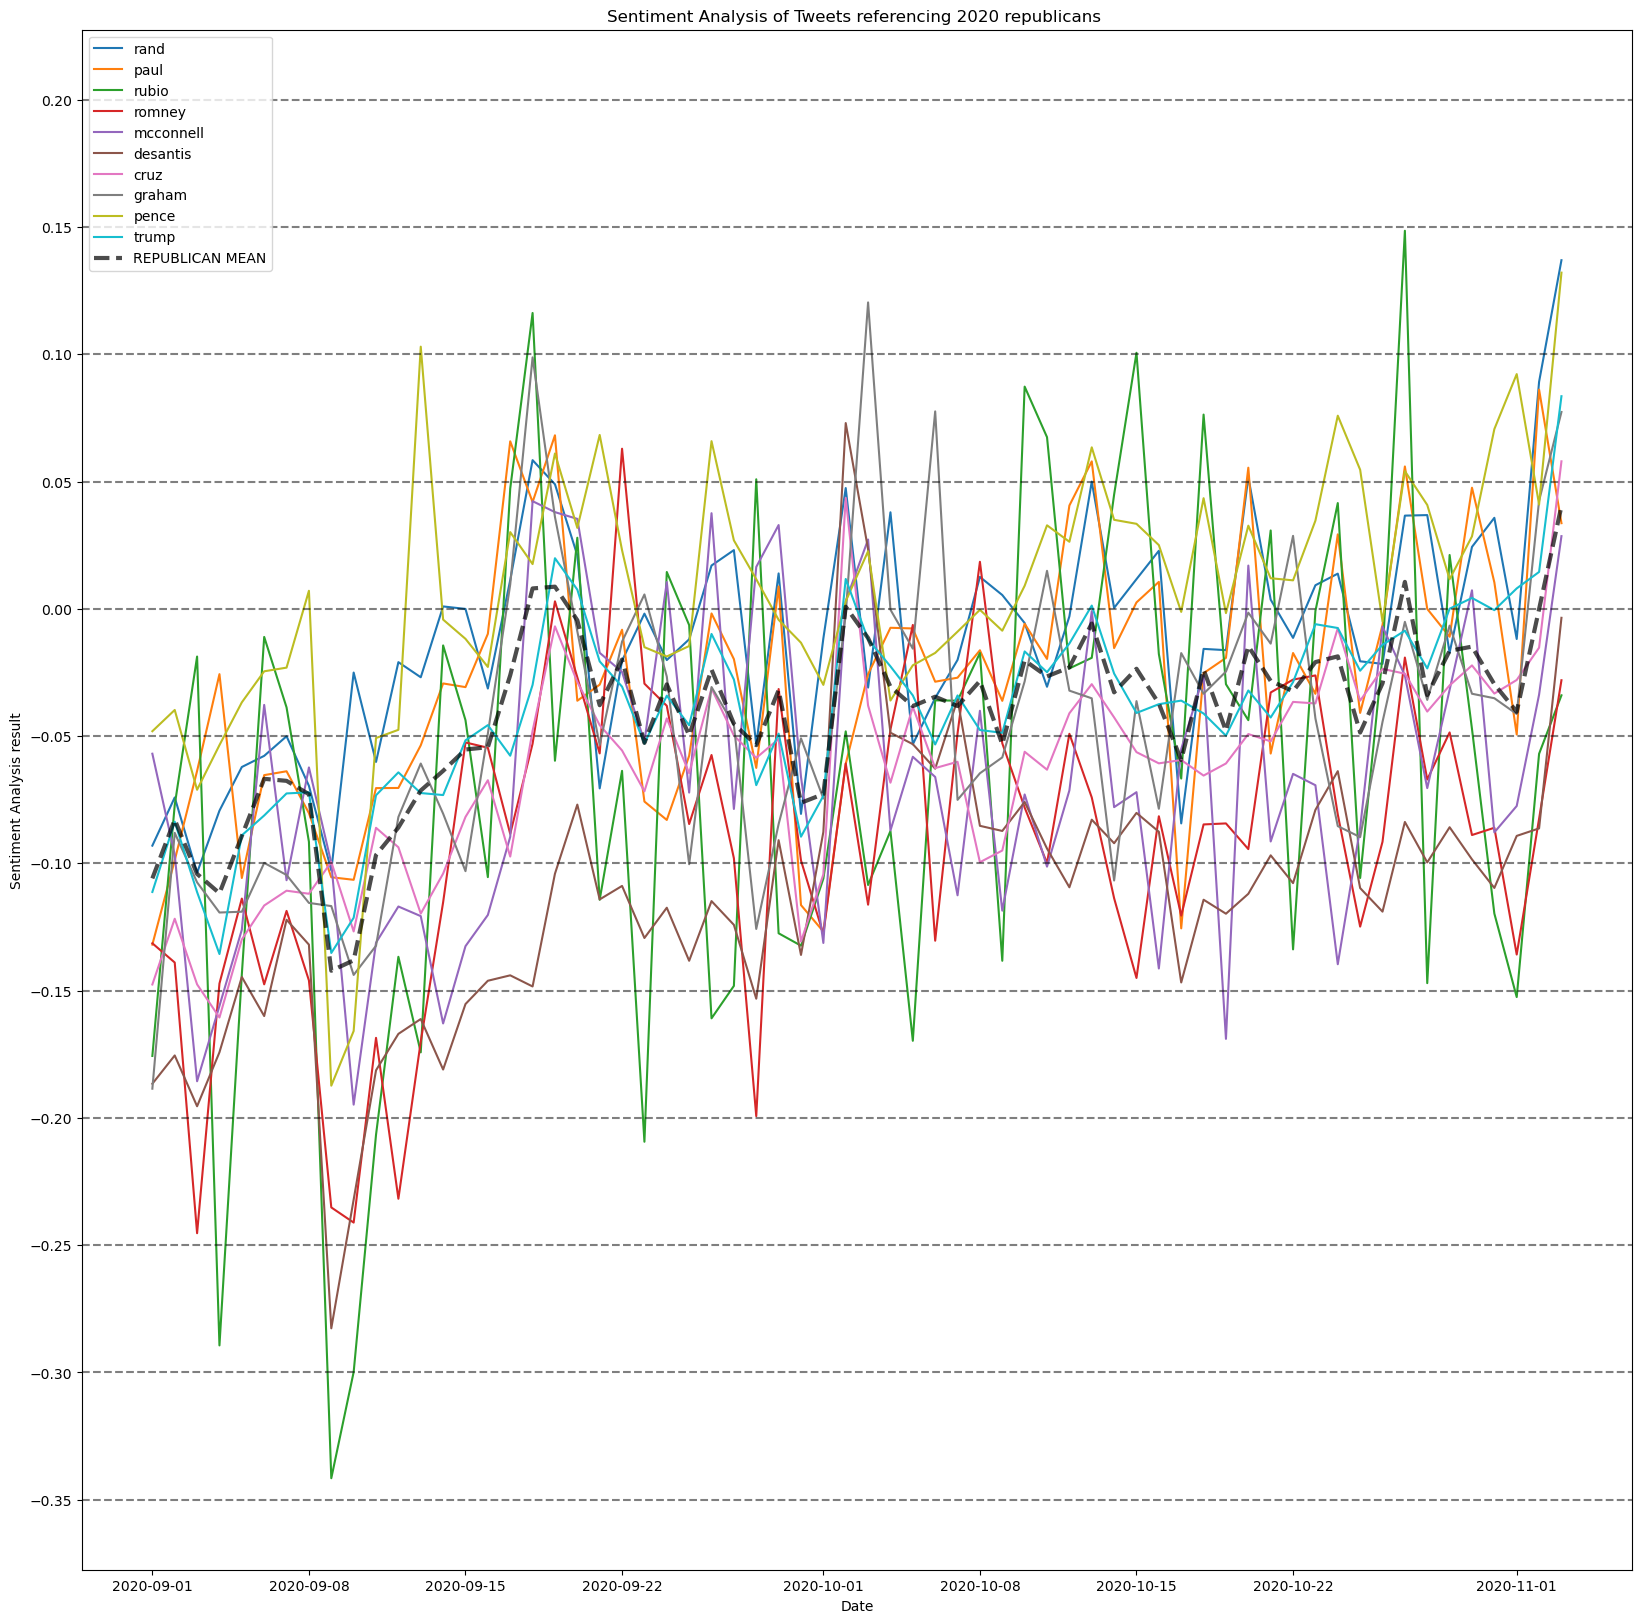

In [125]:
gop_mean=[]
i=0
while i<len(dates):
    temp=[]
    j=0
    while j<len(gop_politicians_vader):
        temp.append(float(gop_politicians_vader[j][i]))
        j=j+1
    gop_mean.append(sum(temp))
    
    
    i=i+1
gop_mean=[i/12 for i in gop_mean]

fig,ax=plt.subplots(figsize=(20,20))
plt.style.use('default')

i=0
while i<len(gop_politicians):
    ax.plot(dates,gop_politicians_vader[i],label=f'{gop_politicians[i]}')

    i=i+1


gop_ticks=np.linspace(-.35,.2,12)

ax.set_title("Sentiment Analysis of Tweets referencing 2020 republicans ")
ax.set_yticks(gop_ticks)
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Analysis result")
ax.legend()
for i in gop_ticks:
    ax.axhline(i,color='black',ls='--',alpha=grid_alpha)    
 
    

ax.plot(dates,gop_mean,label="REPUBLICAN MEAN",color='black',linewidth=3,alpha=.7,linestyle='--')
ax.legend()

plt.savefig('gop_politicians_LSA.jpg',dpi=400)
plt.show()

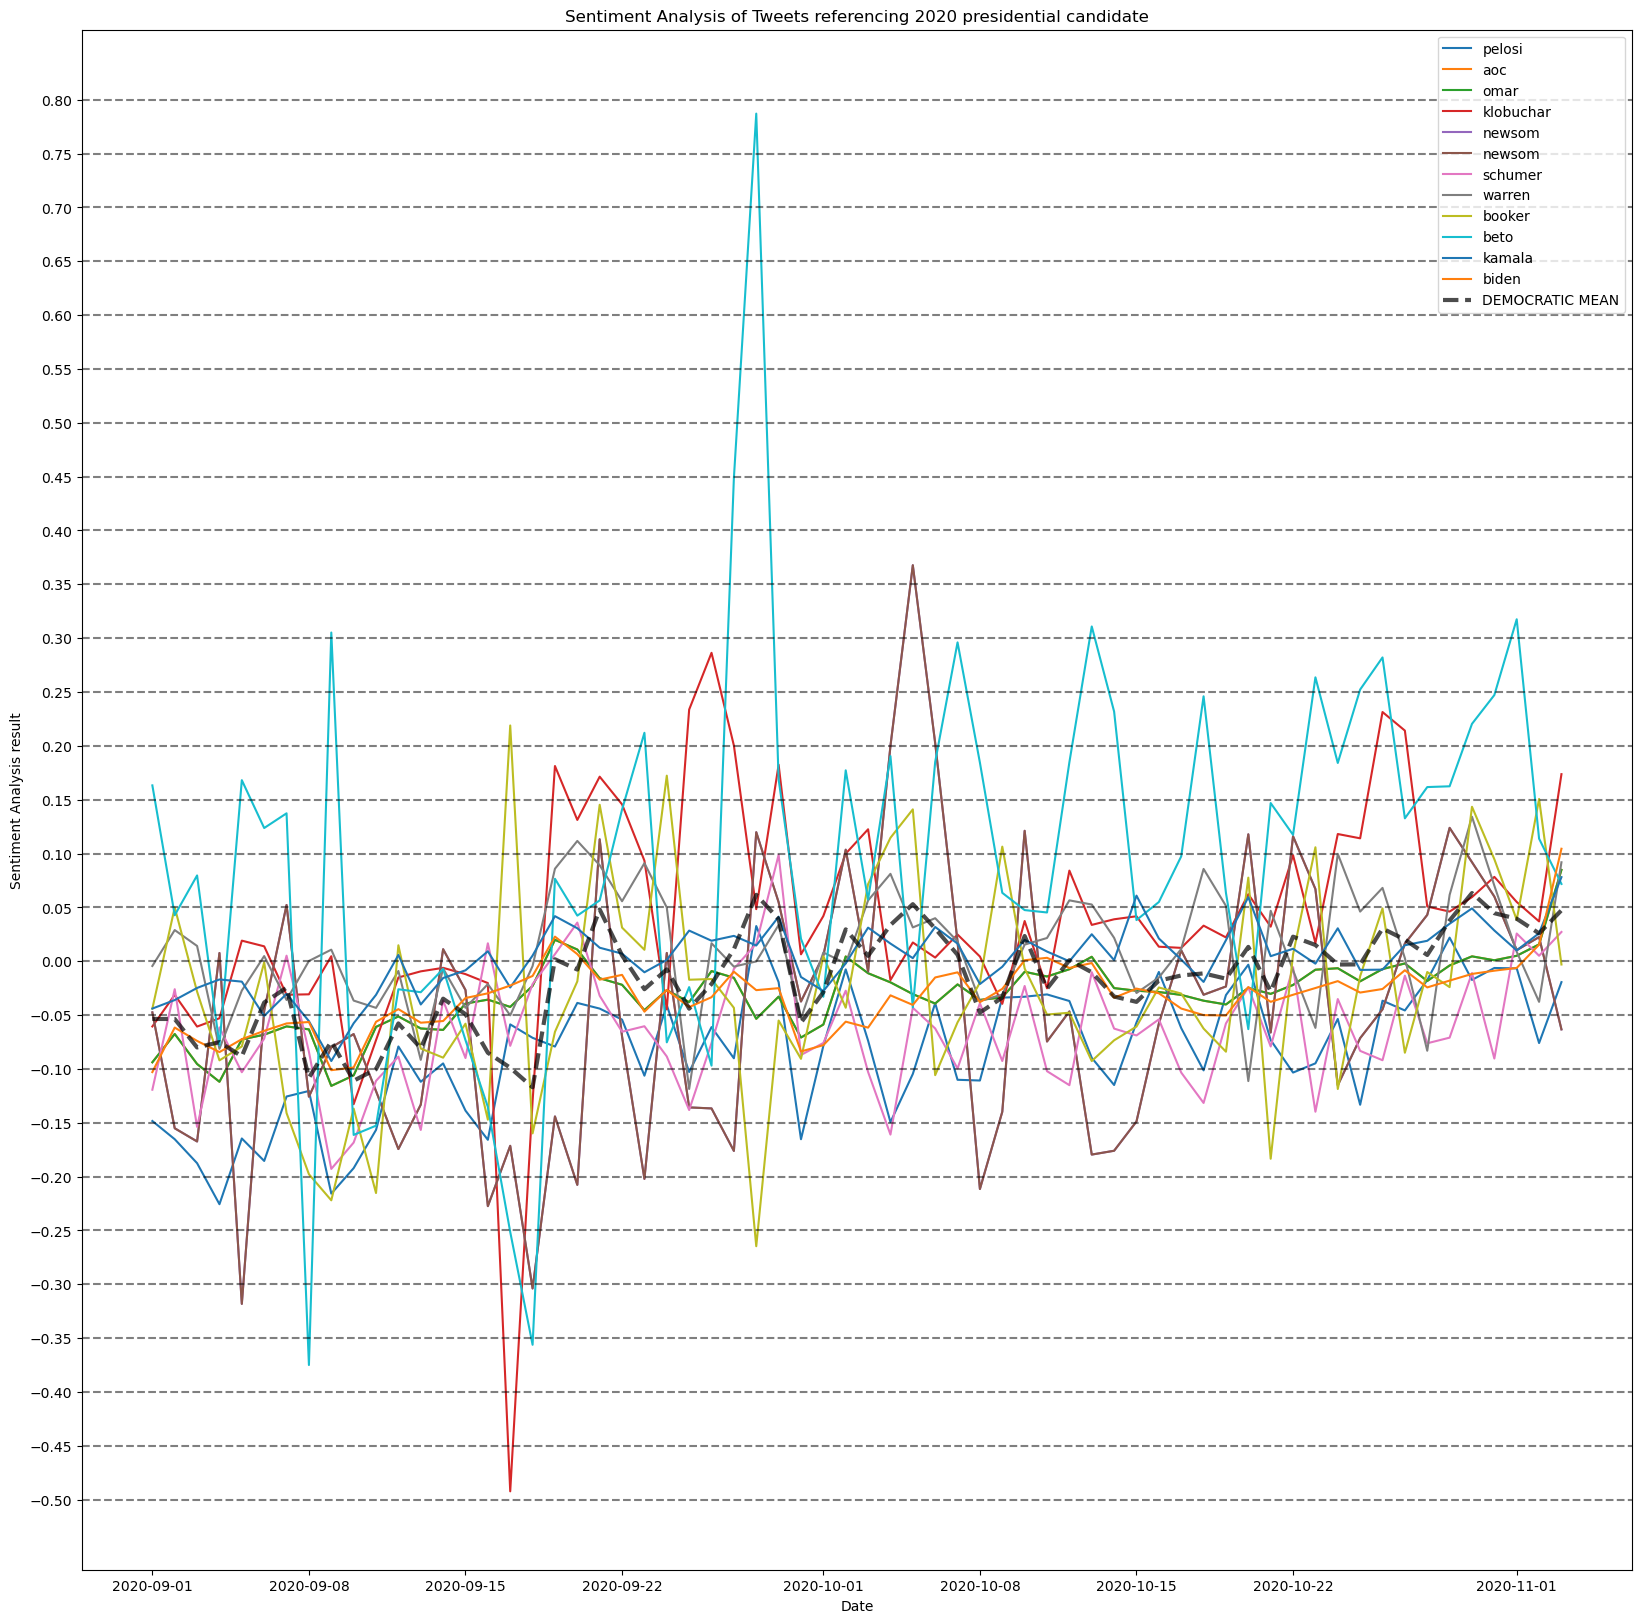

In [126]:
dem_mean=[]
i=0
while i<len(dates):
    temp=[]
    j=0
    while j<len(dem_politicians_vader):
        temp.append(float(dem_politicians_vader[j][i]))
        j=j+1
    dem_mean.append(sum(temp))
    
    
    i=i+1
dem_mean=[i/12 for i in dem_mean]

fig,ax=plt.subplots(figsize=(20,20))
plt.style.use('default')

i=0
while i<len(dem_politicians):
    ax.plot(dates,dem_politicians_vader[i],label=f'{dem_politicians[i]}')

    i=i+1


dem_ticks=np.linspace(-.5,.8,27)

ax.set_title("Sentiment Analysis of Tweets referencing 2020 presidential candidate")
ax.set_yticks(dem_ticks)
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Analysis result")
ax.legend()
for i in dem_ticks:
    ax.axhline(i,color='black',ls='--',alpha=grid_alpha)    
 
    

ax.plot(dates,dem_mean,label="DEMOCRATIC MEAN",color='black',linewidth=3,alpha=.7,linestyle='--')
ax.legend()
plt.savefig('dem_politicians_LSA.jpg',dpi=400)
plt.show()


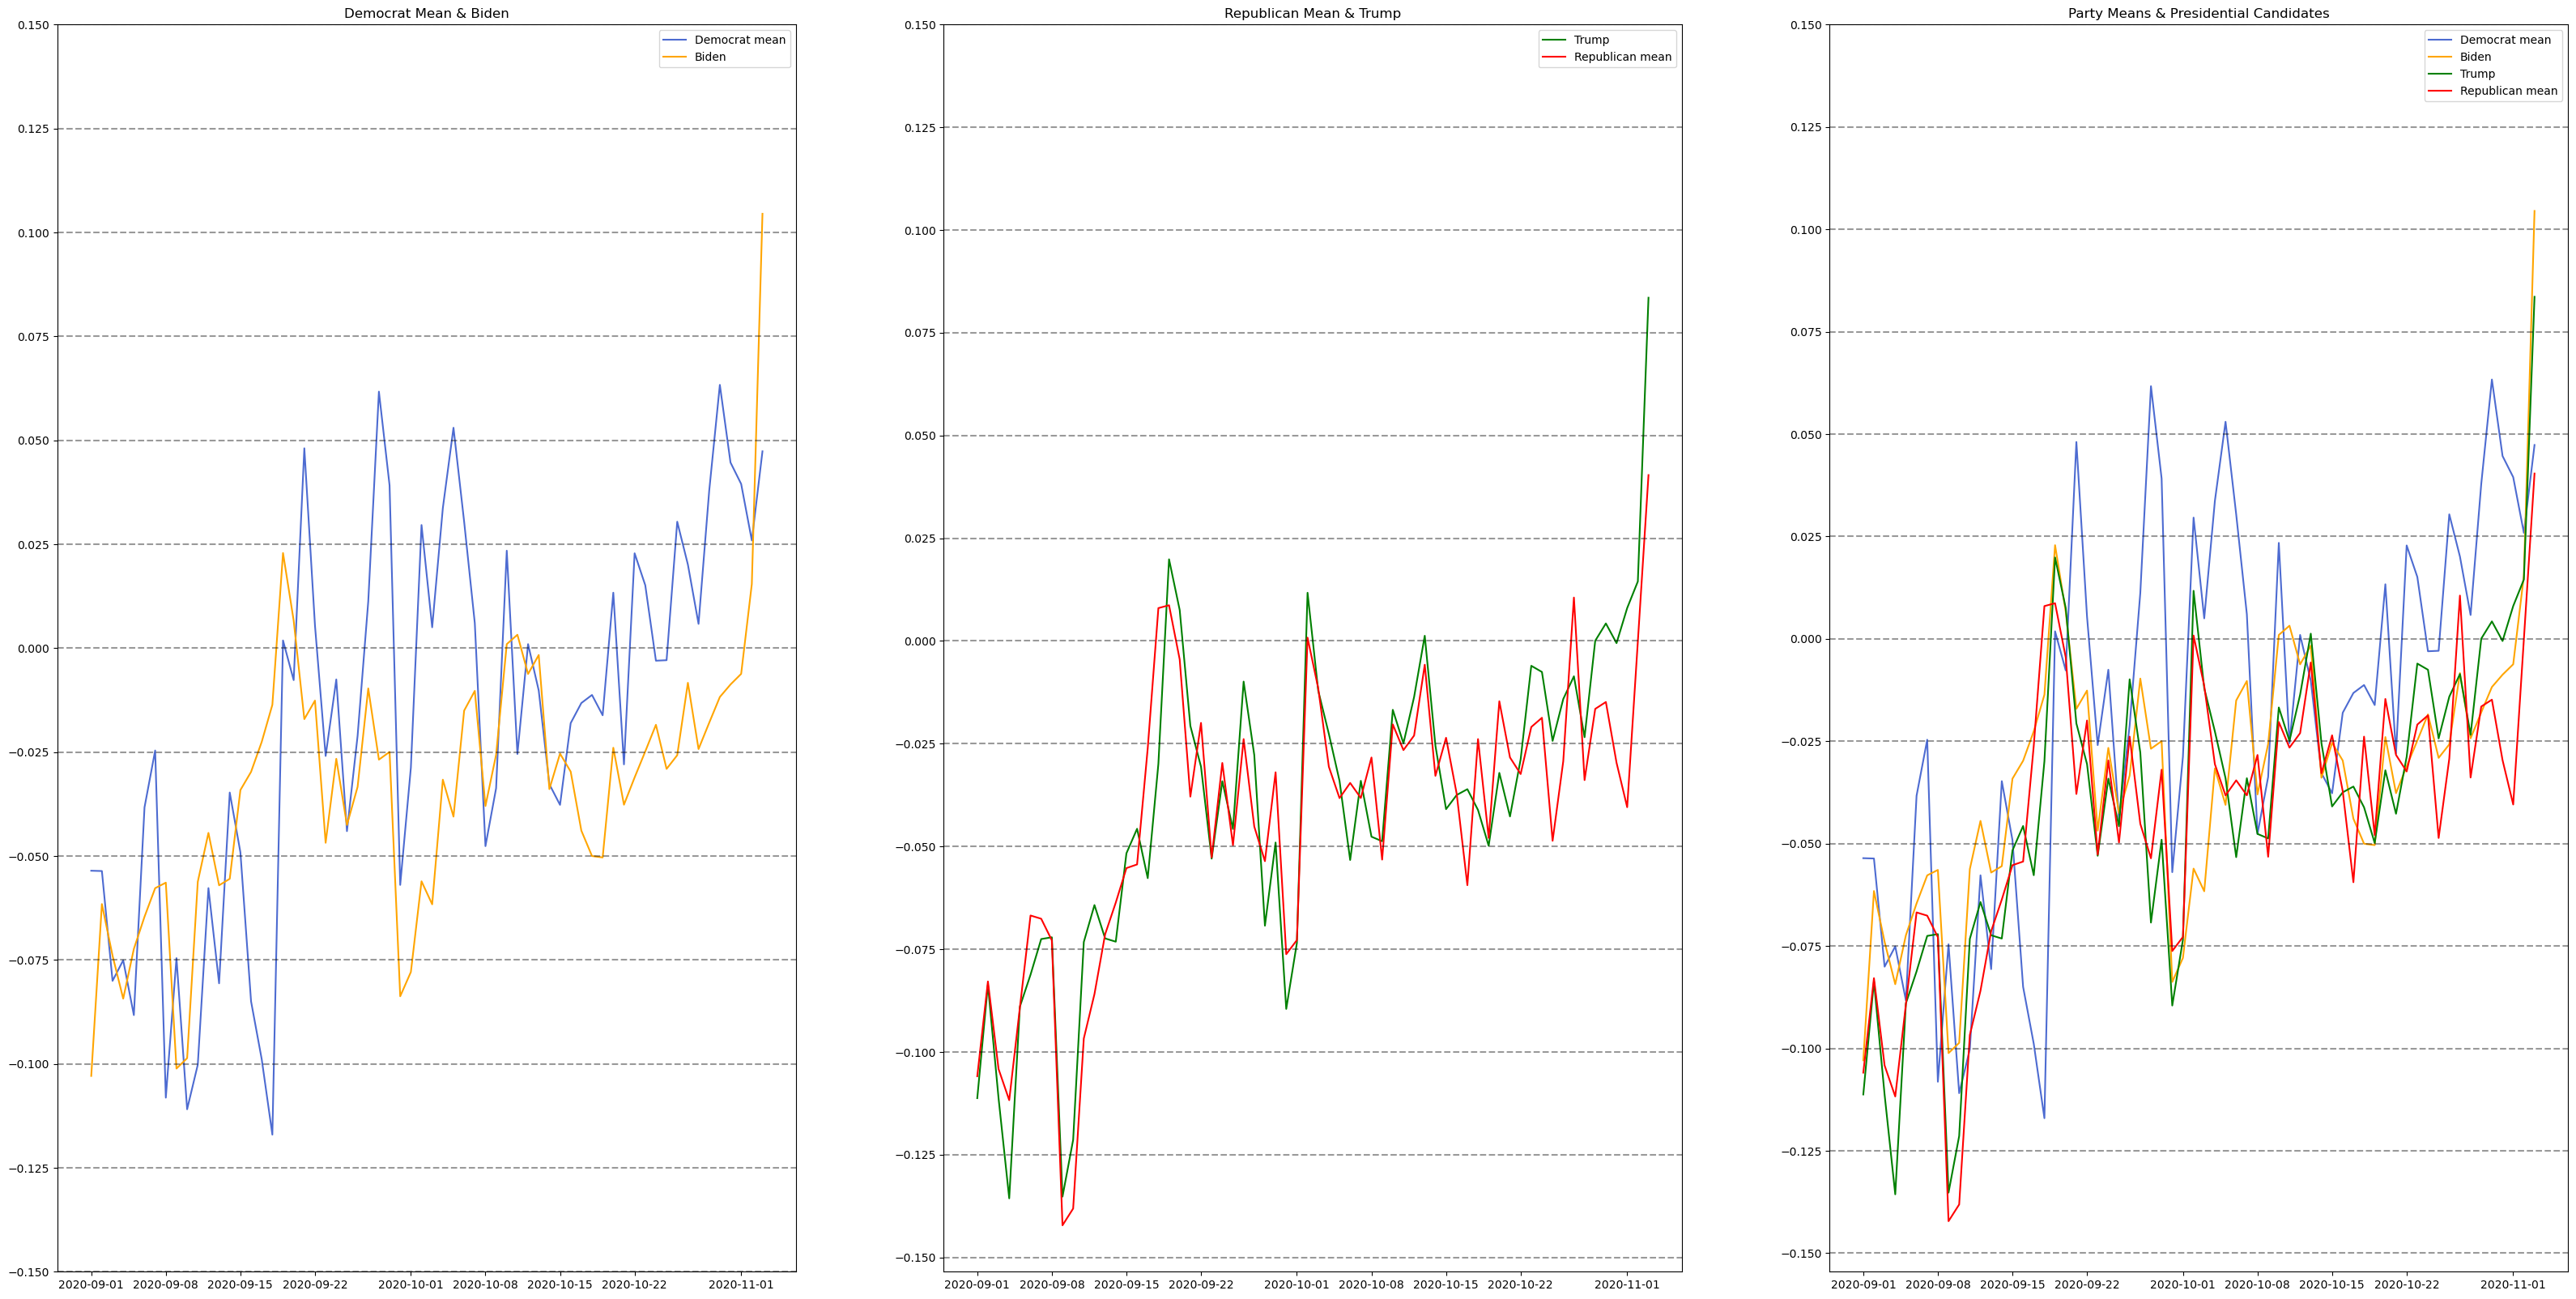

In [147]:
fig,ax=plt.subplots(1,3,figsize=(40,20))

yticks=np.linspace(-.15,.15,13)

ax[0].set_title("Democrat Mean & Biden")
ax[0].plot(dates,dem_mean,label='Democrat mean',color='#4D6BD1')
ax[0].plot(dates,B_daily_VADER,label="Biden",color='orange')
ax[0].set_yticks(yticks)
ax[0].legend()



ax[1].set_title("Republican Mean & Trump")
ax[1].plot(dates,T_daily_VADER,label="Trump",color='green')
ax[1].plot(dates,gop_mean,label='Republican mean',color='red')
ax[1].set_yticks(yticks)
ax[1].legend()



ax[2].set_title("Party Means & Presidential Candidates")
ax[2].plot(dates,dem_mean,label='Democrat mean',color='#4D6BD1')
ax[2].plot(dates,B_daily_VADER,label="Biden",color='orange')
ax[2].plot(dates,T_daily_VADER,label="Trump",color='green')
ax[2].plot(dates,gop_mean,label='Republican mean',color='red')
ax[2].set_yticks(yticks)
ax[2].legend()

for i in yticks:
    ax[0].axhline(i,alpha=.4,linestyle='--',color='black')
    ax[1].axhline(i,alpha=.4,linestyle='--',color='black')
    ax[2].axhline(i,alpha=.4,linestyle='--',color='black')
    
plt.savefig("Party Means and Presidential Candidates.jpg",dpi='figure')
plt.show()

In [32]:
"""
kamala_daily_VADER
pence_daily_VADER
dem_daily_VADER
gop_daily_VADER
"""

'\nkamala_daily_VADER\npence_daily_VADER\ndem_daily_VADER\ngop_daily_VADER\n'

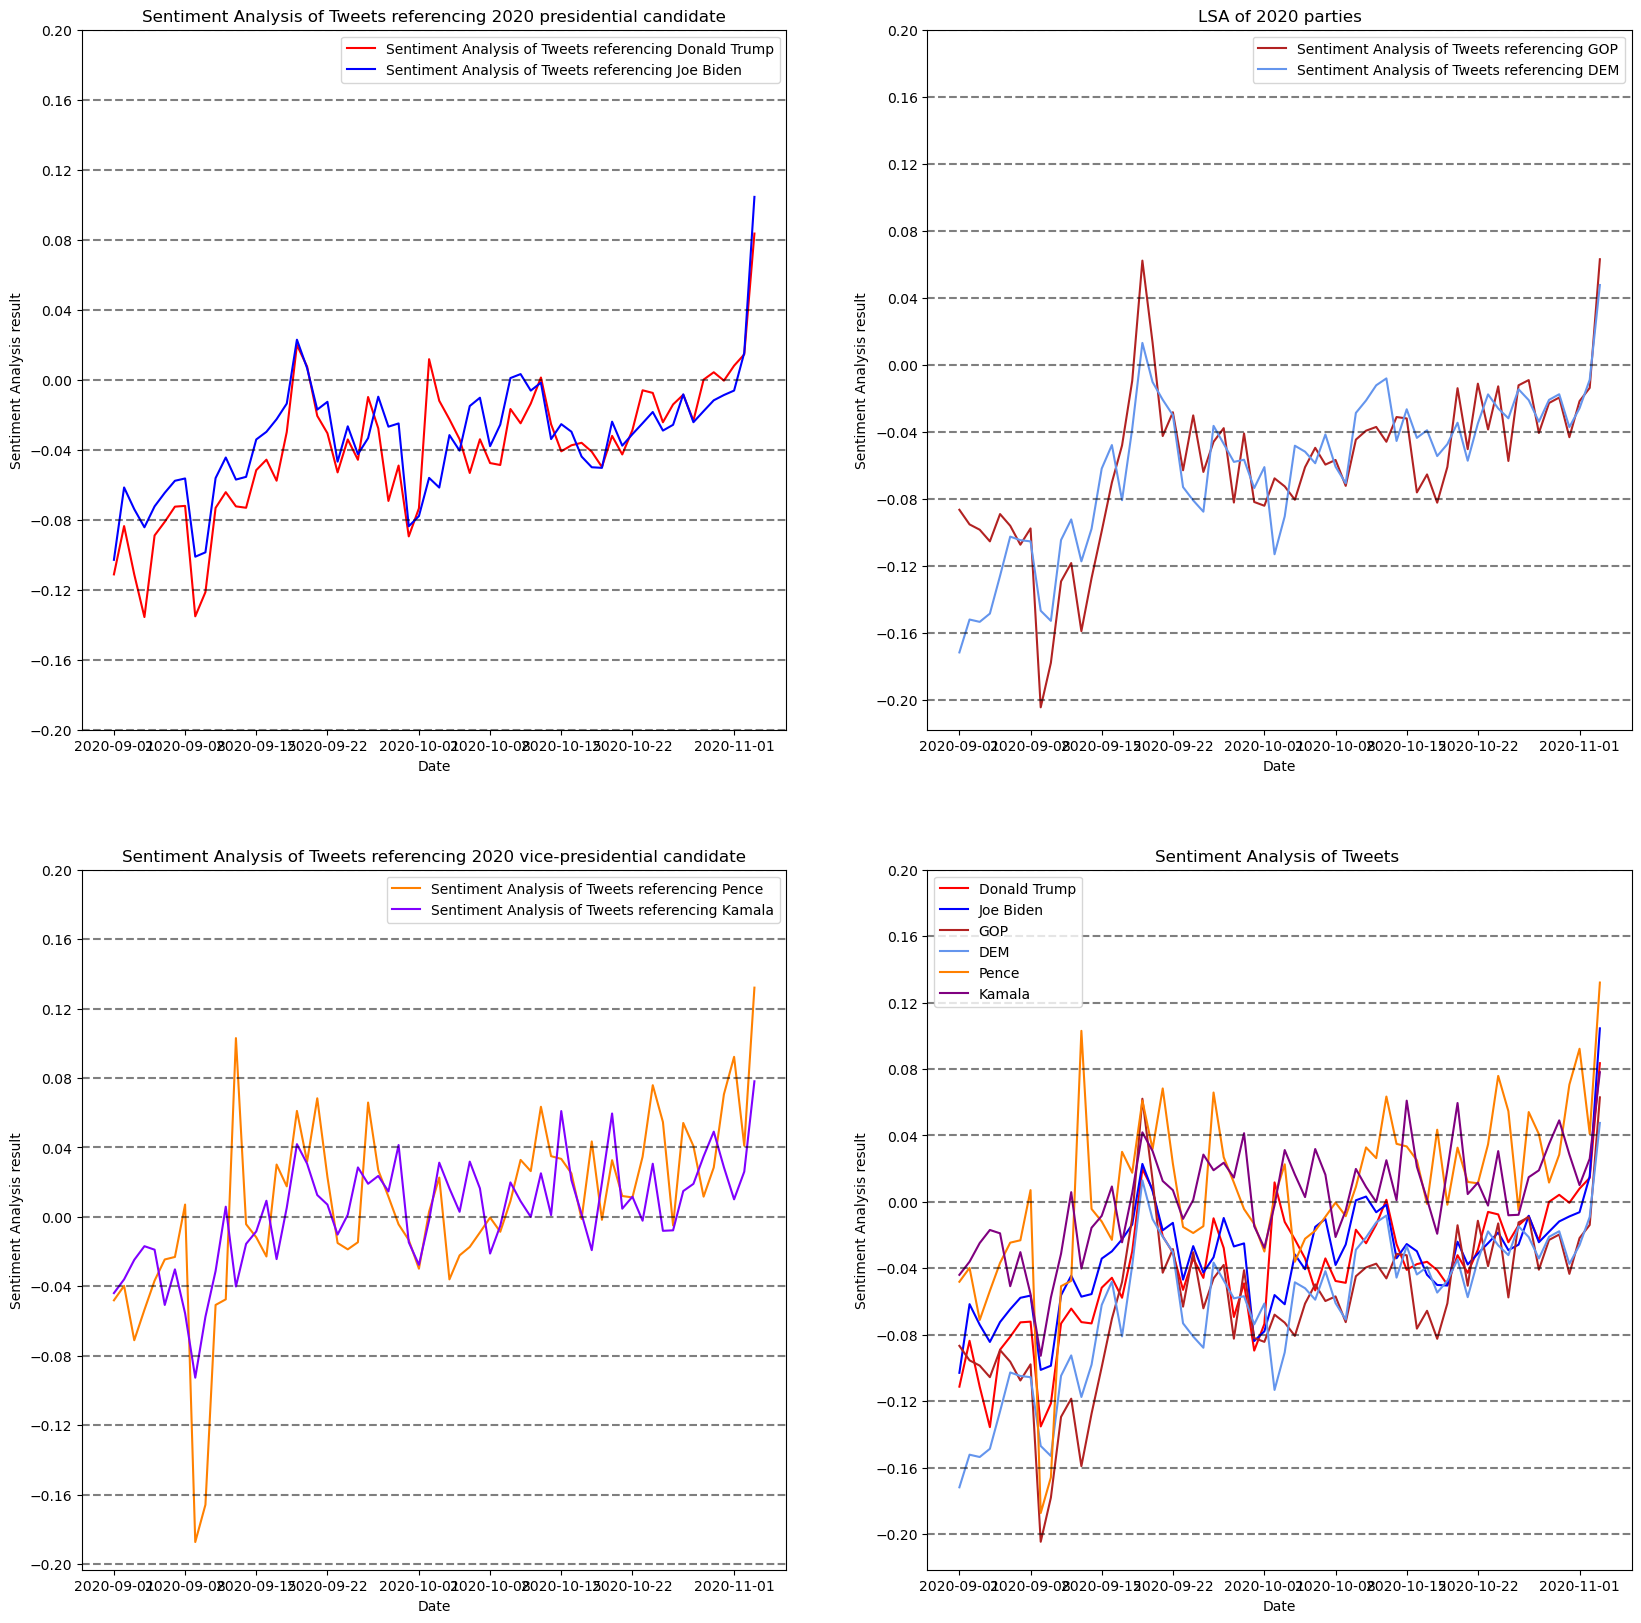

In [19]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
plt.style.use('default')
#########################################
ax[0,0].plot(dates,T_daily_VADER,label='Sentiment Analysis of Tweets referencing Donald Trump',c="red")
ax[0,0].plot(dates,B_daily_VADER,label='Sentiment Analysis of Tweets referencing Joe Biden',c="blue")
ax[0,0].set_title("Sentiment Analysis of Tweets referencing 2020 presidential candidate")
ax[0,0].set_yticks(yticks)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Sentiment Analysis result")
ax[0,0].legend()
for i in yticks:
    ax[0,0].axhline(i,color='black',ls='--',alpha=grid_alpha)

    
##################################
ax[1,0].plot(dates,pence_daily_VADER,label='Sentiment Analysis of Tweets referencing Pence',c="#FF8000")
ax[1,0].plot(dates,kamala_daily_VADER,label='Sentiment Analysis of Tweets referencing Kamala',c="#8000FF")
ax[1,0].set_title("Sentiment Analysis of Tweets referencing 2020 vice-presidential candidate")
ax[1,0].set_yticks(yticks)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("Sentiment Analysis result")
ax[1,0].legend()
for i in yticks:
    ax[1,0].axhline(i,color='black',ls='--',alpha=grid_alpha)

##################################
ax[0,1].plot(dates,gop_daily_VADER,label='Sentiment Analysis of Tweets referencing GOP',c="firebrick")
ax[0,1].plot(dates,dem_daily_VADER,label='Sentiment Analysis of Tweets referencing DEM',c="cornflowerblue")
ax[0,1].set_title("LSA of 2020 parties")
ax[0,1].set_yticks(yticks)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Sentiment Analysis result")
ax[0,1].legend()
for i in yticks:
    ax[0,1].axhline(i,color='black',ls='--',alpha=grid_alpha)
    
##################################
ax[1,1].plot(dates,T_daily_VADER,label='Donald Trump',c="red")
ax[1,1].plot(dates,B_daily_VADER,label='Joe Biden',c="blue")

ax[1,1].plot(dates,gop_daily_VADER,label='GOP',c="firebrick")
ax[1,1].plot(dates,dem_daily_VADER,label='DEM',c="cornflowerblue")

ax[1,1].plot(dates,pence_daily_VADER,label='Pence',c="#FF8000")
ax[1,1].plot(dates,kamala_daily_VADER,label='Kamala',c="purple")

ax[1,1].set_title("Sentiment Analysis of Tweets ")
ax[1,1].set_yticks(yticks)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Sentiment Analysis result")
ax[1,1].legend()
for i in yticks:
    ax[1,1].axhline(i,color='black',ls='--',alpha=grid_alpha)


plt.savefig("everything.jpg",dpi=200,bbox_inches="tight")
plt.show()

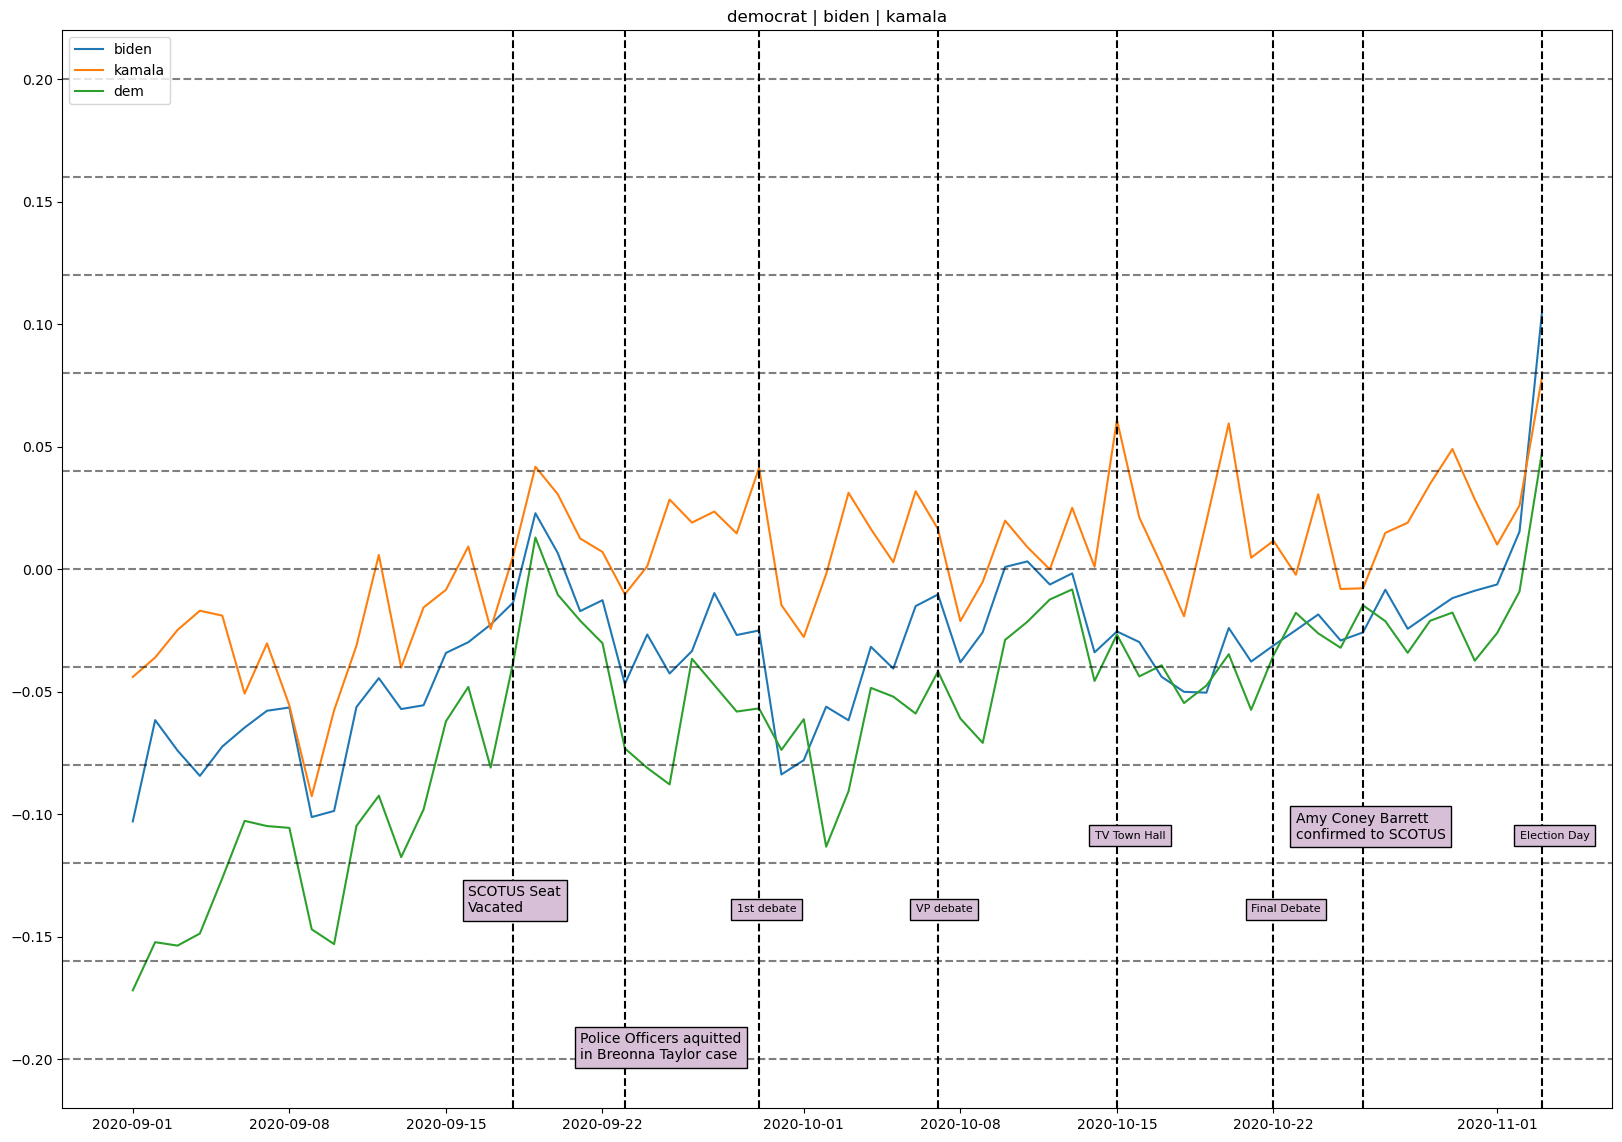

In [20]:
fig,ax=plt.subplots(1,1,figsize=(20,14))
ax.plot(dates,B_daily_VADER,label="biden")
ax.plot(dates,kamala_daily_VADER,label="kamala")
ax.plot(dates,dem_daily_VADER,label="dem")



for i in yticks:
    ax.axhline(i,color='black',ls='--',alpha=grid_alpha)
    
ax.text(dates[15],-.14,s="SCOTUS Seat\nVacated",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)
ax.text(dates[20],-.2,s="Police Officers aquitted\nin Breonna Taylor case",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)
ax.text(dates[52],-.11,s="Amy Coney Barrett\nconfirmed to SCOTUS",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)



ax.axvline(b_weighted_mean.index[28],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[36],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[44],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[51],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[-1],color='black',ls='--', alpha=1,)
ax.axvline(dates[17],color='black',ls='--', alpha=1,)
ax.axvline(dates[22],color='black',ls='--', alpha=1,)
ax.axvline(dates[55],color='black',ls='--', alpha=1,)
ax.text(b_weighted_mean.index[27],-.14,s="1st debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[35],-.14,s="VP debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[43],-.11,s="TV Town Hall",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[50],-.14,s="Final Debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[-2],-.11,s="Election Day",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)

ax.set_title("democrat | biden | kamala")
ax.legend()
plt.savefig("Democrats.jpg",dpi=200,bbox_inches="tight")
plt.show()

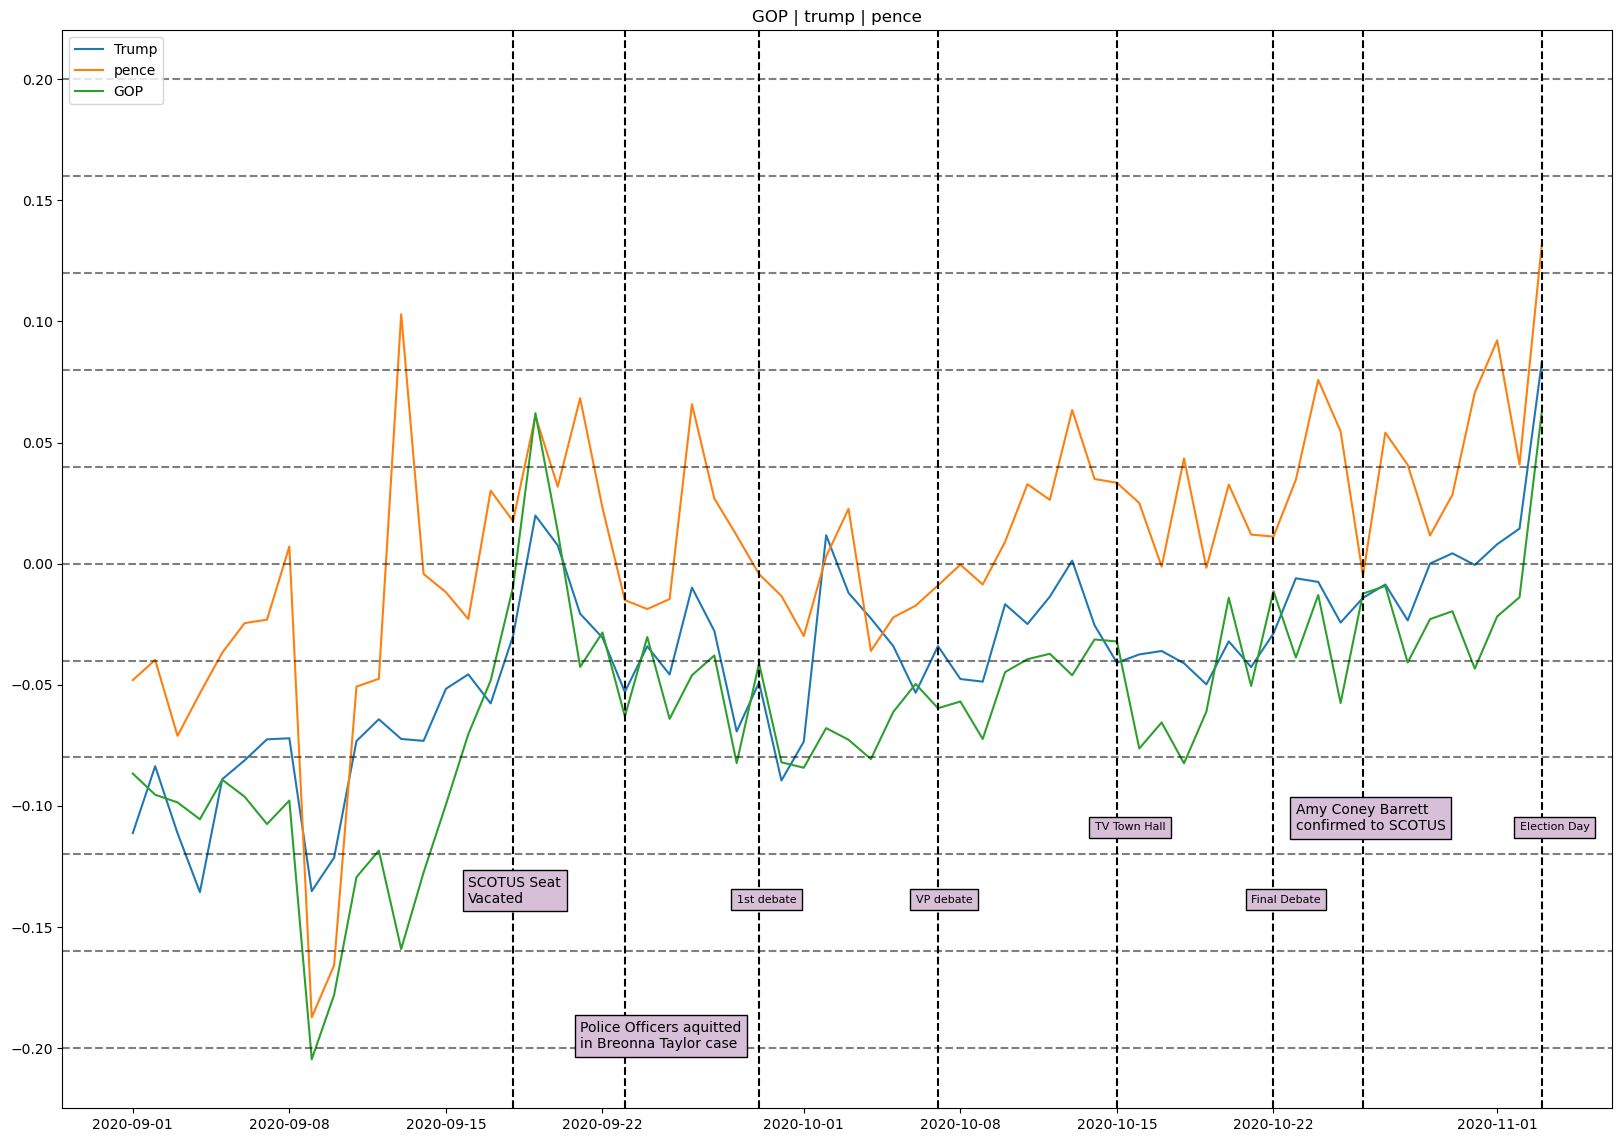

In [21]:
fig,ax=plt.subplots(1,1,figsize=(20,14))
ax.plot(dates,T_daily_VADER,label="Trump")
ax.plot(dates,pence_daily_VADER,label="pence")
ax.plot(dates,gop_daily_VADER,label="GOP")



for i in yticks:
    ax.axhline(i,color='black',ls='--',alpha=grid_alpha)
    
ax.text(dates[15],-.14,s="SCOTUS Seat\nVacated",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)
ax.text(dates[20],-.2,s="Police Officers aquitted\nin Breonna Taylor case",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)
ax.text(dates[52],-.11,s="Amy Coney Barrett\nconfirmed to SCOTUS",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)



ax.axvline(b_weighted_mean.index[28],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[36],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[44],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[51],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[-1],color='black',ls='--', alpha=1,)
ax.axvline(dates[17],color='black',ls='--', alpha=1,)
ax.axvline(dates[22],color='black',ls='--', alpha=1,)
ax.axvline(dates[55],color='black',ls='--', alpha=1,)
ax.text(b_weighted_mean.index[27],-.14,s="1st debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[35],-.14,s="VP debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[43],-.11,s="TV Town Hall",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[50],-.14,s="Final Debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[-2],-.11,s="Election Day",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)

ax.set_title("GOP | trump | pence")
ax.legend()
plt.savefig("republicans.jpg",dpi=200,bbox_inches="tight")
plt.show()

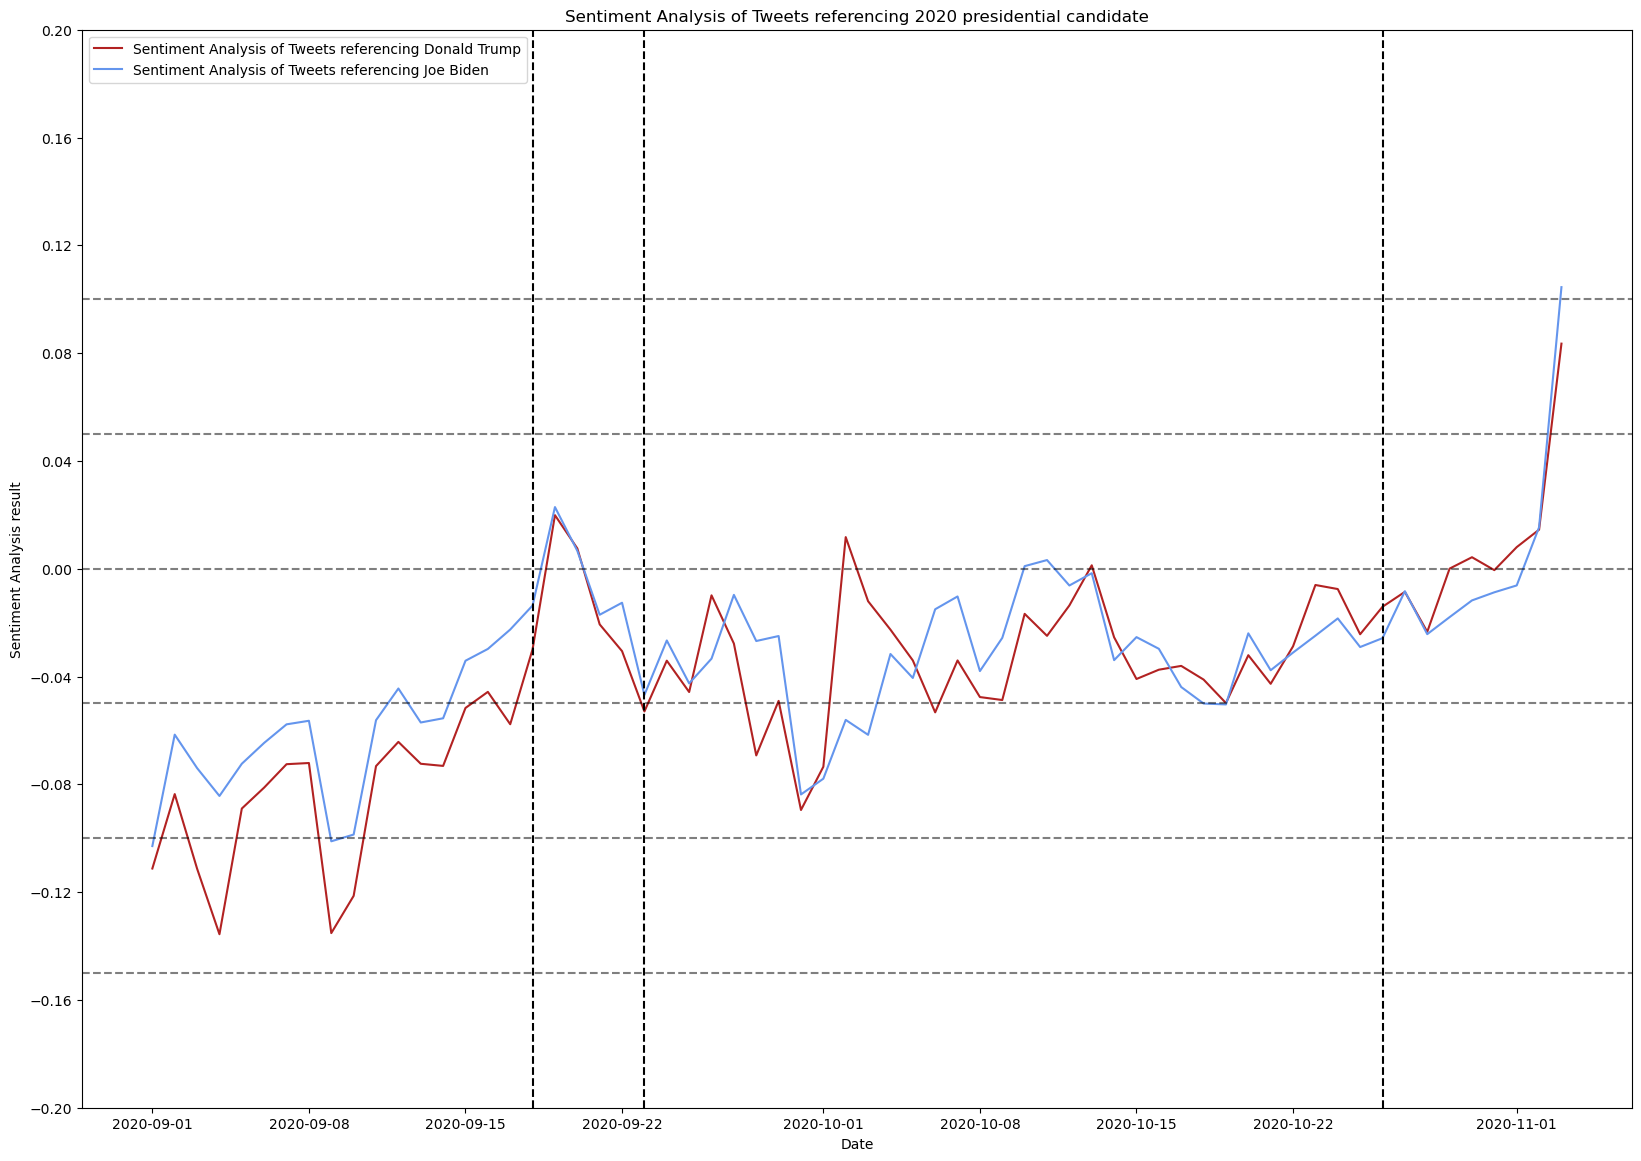

In [22]:
fig,ax=plt.subplots(1,1,figsize=(20,14))

ax.plot(dates,T_daily_VADER,label='Sentiment Analysis of Tweets referencing Donald Trump',c="firebrick")
ax.plot(dates,B_daily_VADER,label='Sentiment Analysis of Tweets referencing Joe Biden',c="cornflowerblue")
ax.set_title("Sentiment Analysis of Tweets referencing 2020 presidential candidate")
ax.set_yticks(yticks)

ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Analysis result")
ax.axhline(-.15, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-.10, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-.05, color='black',ls='--',alpha=grid_alpha)
ax.axhline(0, color='black',ls='--',alpha=grid_alpha)
ax.axhline(.05, color='black',ls='--',alpha=grid_alpha)
ax.axhline(.10, color='black',ls='--',alpha=grid_alpha)
ax.axvline(dates[17],color='black',ls='--', alpha=1,)
ax.axvline(dates[22],color='black',ls='--', alpha=1,)
ax.axvline(dates[55],color='black',ls='--', alpha=1,)
ax.legend()
plt.show()

In [23]:
#

NameError: name 'date_list' is not defined

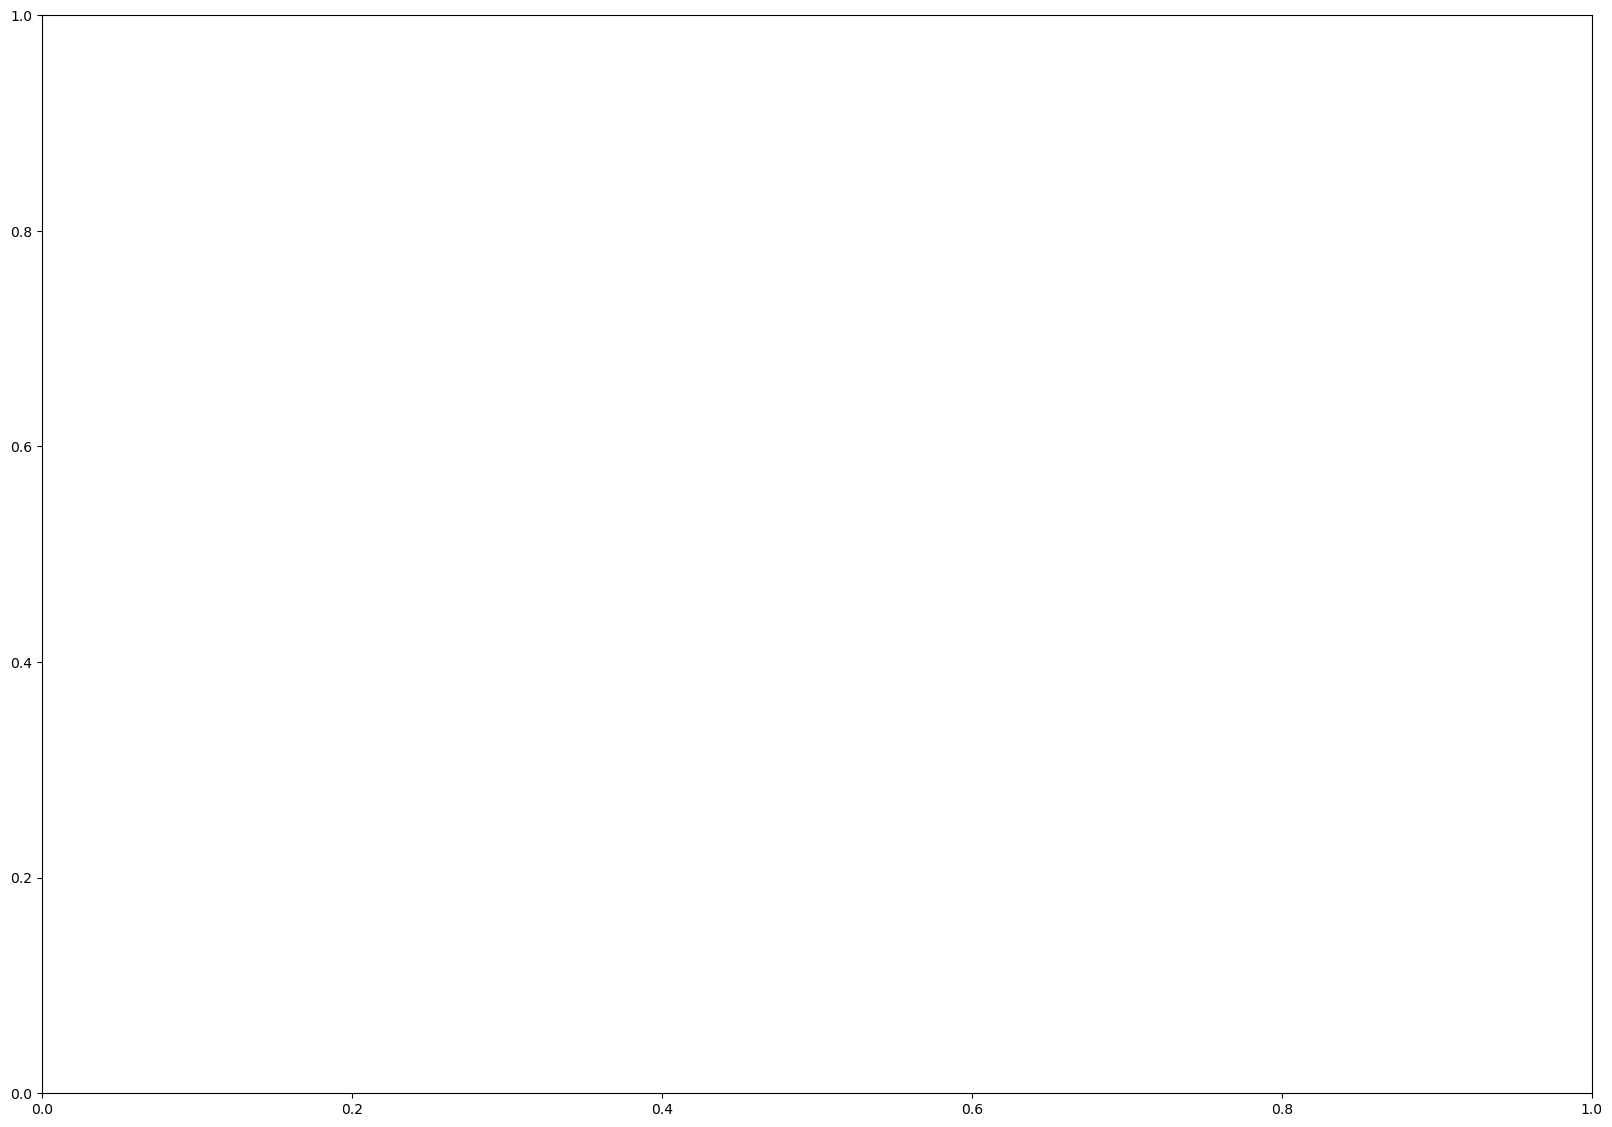

In [24]:
fig,ax=plt.subplots(figsize=(20,14))

ax.plot(date_list,T_daily_VADER,label='Sentiment Analysis of Tweets referencing Donald Trump',c="firebrick")
ax.plot(date_list,B_daily_VADER,label='Sentiment Analysis of Tweets referencing Joe Biden',c="cornflowerblue")



ax.axhline(0, color='black',ls='--')
ax.set_title("Comparison Between Biden and Trump's Sentiment Indexes")
ax.legend()
ax.axvline(dates[17],color='black',ls='--', alpha=1,)
ax.axvline(dates[22],color='black',ls='--', alpha=1,)
ax.axvline(dates[55],color='black',ls='--', alpha=1,)

ax.text(dates[15],-.14,s="SCOTUS Seat\nVacated",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)
ax.text(dates[20],-.11,s="Police Officers aquitted\nin Breonna Taylor case",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)
ax.text(dates[52],-.11,s="Amy Coney Barrett\nconfirmed to SCOTUS",bbox=dict(facecolor='thistle', alpha=1),fontsize=10)


ax.axhline(0, color='black',ls='--')
ax.axhline(-.15, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-.10, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-.05, color='black',ls='--',alpha=grid_alpha)
ax.axhline(.05, color='black',ls='--',alpha=grid_alpha)
ax.axhline(.10, color='black',ls='--',alpha=grid_alpha)
ax.axvline(b_weighted_mean.index[28],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[36],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[44],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[51],color='black',ls='--', alpha=1,)
ax.axvline(b_weighted_mean.index[-1],color='black',ls='--', alpha=1,)
ax.text(b_weighted_mean.index[27],-.14,s="1st debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[35],-.14,s="VP debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[43],-.11,s="TV Town Hall",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[50],-.14,s="Final Debate",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.text(b_weighted_mean.index[-2],-.11,s="Election Day",bbox=dict(facecolor='thistle', alpha=1),fontsize=8)
ax.legend()
plt.show()

### Correlations between Polling and Twitter Sentiment data
<a id='corr'></a>

A correlation coefficient represents how strongly two variables are linked. Correlation coefficients measure the strength of the connection (positive or negative) between the two factors.

[[Table of Contents]](#contents)
________________________

In [ ]:
temp1={'Date':date_list,'Biden Polling': b_weighted_mean ,'Biden Sentiment': B_daily_VADER}
bdf=pd.DataFrame(temp1)
bdf.set_index('Date',inplace=True)

temp2={'Date':date_list,'Trump Polling': t_weighted_mean ,'Trump Sentiment': T_daily_VADER}
tdf=pd.DataFrame(temp2)
tdf.set_index('Date',inplace=True)

temp3={'Date':date_list,'Trump Polling': t_weighted_mean ,'Biden Sentiment': B_daily_VADER}
trump_biden_df=pd.DataFrame(temp3)
trump_biden_df.set_index('Date',inplace=True)

temp4={'Date':date_list,'Biden Polling': b_weighted_mean ,'Trump Sentiment': T_daily_VADER}
biden_trump_df=pd.DataFrame(temp4)
biden_trump_df.set_index('Date',inplace=True)

temp5={'Date':date_list,'Biden Sentiment': B_daily_VADER ,'Trump Sentiment': T_daily_VADER}
sentiment_indexes=pd.DataFrame(temp5)
sentiment_indexes.set_index('Date',inplace=True)

temp6={'Date':date_list,'Biden Polling': b_weighted_mean ,'Trump Polling': t_weighted_mean}
polling_indexes=pd.DataFrame(temp6)
polling_indexes.set_index('Date',inplace=True)

In [ ]:
print(f"The correlation between {biden_trump_df.columns.to_list()[0]} and {biden_trump_df.columns.to_list()[1]} is %s."%format(biden_trump_df.corr().iloc[0:1,1].item(),".6f"))
print(f"The correlation between {bdf.columns.to_list()[0]} and {bdf.columns.to_list()[1]} is %s." %format(bdf.corr().iloc[0:1,1].item(),".6f"))
print(f"The correlation between {trump_biden_df.columns.to_list()[0]} and {trump_biden_df.columns.to_list()[1]} is %s."%format(trump_biden_df.corr().iloc[0:1,1].item(),".6f"))
print(f"The correlation between {tdf.columns.to_list()[0]} and {tdf.columns.to_list()[1]} is %s." %format(tdf.corr().iloc[0:1,1].item(),".6f"))
print(f"The correlation between {sentiment_indexes.columns.to_list()[0]} and {sentiment_indexes.columns.to_list()[1]} is %s." %format(sentiment_indexes.corr().iloc[0:1,1].item(),".6f"))
print(f"The correlation between {polling_indexes.columns.to_list()[0]} and {polling_indexes.columns.to_list()[1]} is %s." %format(polling_indexes.corr().iloc[0:1,1].item(),".6f"))



### Analyzing Correlation Coefficients
<a id='corr2'></a>


|          Variables                          | Correlation Coefficient       |  Relationship                    |
|          :---:                              |          :---:                | :---:                            |
| Biden Polling and Biden Sentiment           |     -0.091572                 |  None                            |  
| Biden Polling and Trump Sentiment           |     0.056363                  |  None                            |
| <b>Trump Polling and Biden Sentiment</b>    |     <b>0.433502</b>           |  <b>Positive</b>      |
| <b>Trump Polling and Trump Sentiment</b>    |     <b>0.573365</b>           |  <b>Positive</b>      | 
| <b>Biden Sentiment and Trump Sentiment</b>    |     <b>0.786400</b>           |  <b>Strongly Positive</b>      | 
| <b>Biden Polling and Trump Polling</b>    |     <b>0.245844</b>           |  <b>Weakly Positive</b>      | 


From this data, we can see that both Trump and Biden's sentiment indexes have a positive relationship with Trump's polling average. Biden's polling data does not seem to have a relationship with either sentiment index.

<br>

________________________




### Granger Causality
<a id='granger'></a>

A Granger causality analysis is a test that looks to analyze whether one time series (x<sub>1</sub>) is useful in predicting another (x<sub>2</sub>). x<sub>1</sub> is said to "Granger-cause" x<sub>2</sub> if present data from x<sub>1</sub> provides statistically signifigant information about future values of x<sub>2</sub>. In this 


<br>

<div class="alert alert-block alert-danger">     
<b>note: Granger-causing is a misnomer. Granger causality does not prove a direct, causal relationship but rather is a useful tool to analyze whether there is a predictive relationship between two time-series.
    </b>
</div>

[[Table of Contents]](#contents)
________________________

In [ ]:
print("______________________________________________________\nGranger Causality - Trump Polling and Trump Sentiment:\n______________________________________________________")
results=grangercausalitytests(tdf, maxlag=10)
print("\n\n______________________________________________________\nGranger Causality - Trump Polling and Biden Sentiment:\n______________________________________________________")
results1=grangercausalitytests(trump_biden_df, maxlag=10)
print("______________________________________________________\nGranger Causality - Biden Sentiment and Trump Sentiment:\n______________________________________________________")
results=grangercausalitytests(sentiment_indexes, maxlag=10)

### Analyzing Granger Causality Results
<a id='granger2'></a>

From the Granger Analysis tests, we get the following p-values: <br>

| Time Lag | Trump Poll & Trump Sentiment|Trump Poll & Biden Sentiment|Biden Sentiment & Trump Sentiment
|    :---: |               :---:         |          :---:             | :---:             |
|      1   |          **p=0.0020**      |      **p=0.0035**         |p=0.1748 |
|      2   |          **p=0.0067**      |      **p=0.0001**         |p=0.4170 |
|      3   |          **p=0.0458**      |      **p=0.0006**         |p=0.5566 |
|      4   |            p=0.0828        |      **p=0.0016**         |p=0.6405 |
|      5   |            p=0.0628        |      **p=0.0021**         |p=0.7615 |
|      6   |            p=0.1027        |      **p=0.0025**         |p=0.7615 |
|      7   |            p=0.1464        |      **p=0.0081**         |p=0.7747 |
         
(bolded text represents p-values of <0.05)

<br>

[[Table of Contents]](#contents)

<br>

________________________

<a id='filter'></a>
### Adjusting Sentiment Indexes

One problem with strictly relying on the VADER method for sentiment analysis is that it does not understand terms outside of the preset lexicon. This can often lead to situations where tweets that are clearly politically motivated are tagged as being "neutral" by the VADER method.

**Example of a tweet with a 0.00 compound score:**<br>
<i>What a headline:  Trump Says he Spoke to Jacob Blakes Family Pastor.   Blakes Family Says They Dont Have a Pastor'</i>

To try and minimize the effect of poorly tagged values, Tweets with compound data between -0.15 and 0.15 have been filtered out to create adjusted sentiment indexes.

[[Table of Contents]](#contents)
________________________


In [ ]:
B_tweets2=B_tweets.copy()
T_tweets2=T_tweets.copy()

In [ ]:
B_tweets2_list=B_tweets2['compound'].between(-.15,.15).to_list()
T_tweets2_list=T_tweets2['compound'].between(-.15,.15).to_list()

B_tweets2_list=[not elem for elem in B_tweets2_list]
T_tweets2_list=[not elem for elem in T_tweets2_list]

In [ ]:
T_tweets2=T_tweets2[T_tweets2_list]
B_tweets2=B_tweets2[B_tweets2_list]

In [ ]:
T_daily_VADER2=[]
for i in date_list:
    T_daily_VADER2.append(T_tweets2.loc[i]['compound'].mean())
    
T_daily_VADER3=[]
i=0
while i<len(date_list):
    T_daily_VADER3.append(abs(float(T_daily_VADER[i])-float(T_daily_VADER2[i])))
    i=i+1
    
B_daily_VADER2=[]
for i in date_list:
    B_daily_VADER2.append(B_tweets2.loc[i]['compound'].mean())
    
B_daily_VADER3=[]
i=0
while i<len(date_list):
    B_daily_VADER3.append(abs(float(B_daily_VADER[i])-float(B_daily_VADER2[i])))
    i=i+1

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(14,20))

ax[0].plot(date_list,T_daily_VADER,label='Trump Sentiment Un-Adjusted',c="green")
ax[0].plot(date_list,T_daily_VADER2,label='Trump Sentiment Adjusted',c="darkviolet")
ax[0].set_title("Comparison between Trump's Adjusted Sentiment Analysis Index and Unadjusted Sentiment Index")


ax[0].set_xlabel("Date")
ax[0].set_ylabel("Sentiment Analysis result")
ax[0].axhline(-.15, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(-.10, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(-.05, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(0, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(.05, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(.10, color='black',ls='--',alpha=grid_alpha)


ax[1].set_title("Comparison between Biden's Adjusted Sentiment Analysis Index and Unadjusted Sentiment Index")
ax[1].plot(date_list,B_daily_VADER,label='Biden Sentiment Un-Adjusted',c="green")
ax[1].plot(date_list,B_daily_VADER2,label='Biden Sentiment Adjusted',c="darkviolet")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Sentiment Analysis result")
ax[1].axhline(-.15, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(-.10, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(-.05, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(0, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(.05, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(.10, color='black',ls='--',alpha=grid_alpha)
ax[1].set_yticks(yticks)


ax[2].set_title("Absolute Value difference between Un/Adjusted Sentiment Analysis Indexes")
ax[2].plot(date_list,B_daily_VADER3,label='Difference in Biden Adjusted/Unadjusted Sentiment',c="blue")
ax[2].plot(date_list,T_daily_VADER3,label='Difference in Trump Adjusted/Unadjusted Sentiment',c="red")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Sentiment Analysis result")

ax[2].axhline(.01, color='black',ls='--',alpha=grid_alpha)
ax[2].axhline(.03, color='black',ls='--',alpha=grid_alpha)

ax[2].axhline(.00, color='black',ls='--',alpha=grid_alpha)
ax[2].axhline(.02, color='black',ls='--',alpha=grid_alpha)
ax[2].axhline(.04, color='black',ls='--',alpha=grid_alpha)



ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[2].legend(loc="upper left")

plt.show()

In [ ]:
temp1={'Date':date_list,'Biden Polling': b_weighted_mean ,'Biden Sentiment': B_daily_VADER2}
bdf2=pd.DataFrame(temp1)
bdf2.set_index('Date',inplace=True)

temp2={'Date':date_list,'Trump Polling': t_weighted_mean ,'Trump Sentiment': T_daily_VADER2}
tdf2=pd.DataFrame(temp2)
tdf2.set_index('Date',inplace=True)

temp3={'Date':date_list,'Trump Polling': t_weighted_mean ,'Biden Sentiment': B_daily_VADER2}
trump_biden_df2=pd.DataFrame(temp3)
trump_biden_df2.set_index('Date',inplace=True)

temp4={'Date':date_list,'Biden Polling': b_weighted_mean ,'Trump Sentiment': T_daily_VADER2}
biden_trump_df2=pd.DataFrame(temp4)
biden_trump_df2.set_index('Date',inplace=True)

temp5={'Date':date_list,'Biden Sentiment': B_daily_VADER2 ,'Trump Sentiment': T_daily_VADER2}
sentiment_indexes2=pd.DataFrame(temp5)
sentiment_indexes2.set_index('Date',inplace=True)

temp6={'Date':date_list,'Biden Polling': b_weighted_mean ,'Trump Polling': t_weighted_mean}
polling_indexes2=pd.DataFrame(temp6)
polling_indexes2.set_index('Date',inplace=True)


In [ ]:
print(f"The new correlation between {biden_trump_df2.columns.to_list()[0]} and {biden_trump_df2.columns.to_list()[1]} is %s."%format(biden_trump_df2.corr().iloc[0:1,1].item(),".6f"))
print(f"The new correlation between {bdf2.columns.to_list()[0]} and {bdf2.columns.to_list()[1]} is %s." %format(bdf2.corr().iloc[0:1,1].item(),".6f"))
print(f"The new correlation between {trump_biden_df2.columns.to_list()[0]} and {trump_biden_df2.columns.to_list()[1]} is %s."%format(trump_biden_df2.corr().iloc[0:1,1].item(),".6f"))
print(f"The new correlation between {tdf2.columns.to_list()[0]} and {tdf2.columns.to_list()[1]} is %s." %format(tdf2.corr().iloc[0:1,1].item(),".6f"))
print(f"The new correlation between {sentiment_indexes2.columns.to_list()[0]} and {sentiment_indexes2.columns.to_list()[1]} is %s." %format(sentiment_indexes2.corr().iloc[0:1,1].item(),".6f"))
print(f"The new correlation between {polling_indexes2.columns.to_list()[0]} and {polling_indexes2.columns.to_list()[1]} is %s." %format(polling_indexes.corr().iloc[0:1,1].item(),".6f"))



In [ ]:
print(f"The difference in the two correlations for {biden_trump_df2.columns.to_list()[0]} and {biden_trump_df2.columns.to_list()[1]} is %s."
      %format(abs(biden_trump_df2.corr().iloc[0:1,1].item()-biden_trump_df.corr().iloc[0:1,1].item()),".6f"))

print(f"The difference in the two correlations for {bdf2.columns.to_list()[0]} and {bdf2.columns.to_list()[1]} is %s." 
      %format(abs(bdf2.corr().iloc[0:1,1].item()-bdf.corr().iloc[0:1,1].item()),".6f"))

print(f"The difference in the two correlations for {trump_biden_df2.columns.to_list()[0]} and {trump_biden_df2.columns.to_list()[1]} is %s."
      %format(abs(trump_biden_df2.corr().iloc[0:1,1].item()-trump_biden_df.corr().iloc[0:1,1].item()),".6f"))

print(f"The difference in the two correlations for {tdf2.columns.to_list()[0]} and {tdf2.columns.to_list()[1]} is %s." 
      %format(abs(tdf2.corr().iloc[0:1,1].item()-tdf.corr().iloc[0:1,1].item()),".6f"))

print(f"The difference in the two correlations for {sentiment_indexes2.columns.to_list()[0]} and {sentiment_indexes2.columns.to_list()[1]} is %s." 
      %format(abs(sentiment_indexes2.corr().iloc[0:1,1].item()-sentiment_indexes.corr().iloc[0:1,1].item()),".6f"))





<a href="#contents">


<div class="alert alert-block alert-info"> 
<b>Click this box to return to the table of contents
</b>    
    
</div>
</a>

<a href="./Final_Project_5.ipynb">


<div class="alert alert-block alert-success"> 
<b>Click this box to continue on to the project conclusion
</b>    
    
</div>

</a>


<a href="./Final_Project_2.ipynb">
<div class="alert alert-block alert-danger"> 
<b>Click this box to return to the sentiment analysis of Twitter posts.
</b>    
    
</div>

</a>